In [2]:
import numpy as np
import pandas as pd

In [3]:
# Data Science Packages
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from  matplotlib import pyplot
import seaborn as sns
import warnings
# Seaborn Style
sns.set(style='ticks')
sns.set_style({'font.family': 'Hiragino Maru Gothic Pro'})
sns.set_palette("cool")

# Pandas Style
pd.set_option("display.max_column", 9999)
pd.set_option("display.max_row", 9999)

# Ignore annoying warning 
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_parquet('/Users/vikaschaturvedi/Documents/TCON/predictive_care/cpe-replacement-latest/data/preprocessed/data_w32_g3/Family-All/maxmin/train.parquet',engine='pyarrow')
print(train.shape)
train.head()

(576640, 180)


assetid               datum  dslam_distinct_modulation  \
0  100097226 2020-04-06 22:00:00                       0.25   
1  100097226 2020-04-04 22:00:00                       0.25   
2  100097226 2020-03-27 23:00:00                       0.25   
3  100097226 2020-03-11 23:00:00                       0.25   
4  100097226 2020-03-17 23:00:00                       0.25   

   dslam_no_of_dominant_modulation  dslam_code_of_dominant_modulation  \
0                         0.046980                               0.04   
1                         0.046980                               0.04   
2                         0.040268                               0.04   
3                         0.042506                               0.04   
4                         0.040268                               0.04   

   dslam_avg_bitrate_us  dslam_avg_bitrate_ds  dslam_avg_attenuation_ds  \
0              0.009344              0.001149                  0.159955   
1              0.009344              0.001149                  0.159955   
2              0.009344              0.001149                  0.159955   
3              0.009344              0.001149                  0.159955   
4              0.009344              0.001149                  0.159955   

   dslam_avg_attenuation_us  dslam_avg_power_us  dslam_avg_power_ds  \
0                  0.211827            0.305322            0.440536   
1                  0.210449            0.305322            0.440536   
2                  0.210449            0.305322            0.440536   
3                  0.210449            0.305322            0.440536   
4                  0.210449            0.305322            0.440536   

   dslam_avg_att_bitrate_us  dslam_avg_att_bitrate_ds  dslam_avg_snr_us  \
0                  0.013728                  0.111713          0.261880   
1                  0.013725                  0.111729          0.261554   
2                  0.013728                  0.111907          0.261458   
3                  0.013721                  0.111774          0.261880   
4                  0.013723                  0.111709          0.261902   

   dslam_avg_snr_ds  dslam_no_counts  dslam_avg_bandline_ds  \
0          0.272109         0.666667                   -1.0   
1          0.272689         0.666667                   -1.0   
2          0.272780         0.575758                   -1.0   
3          0.272640         0.606061                   -1.0   
4          0.272109         0.575758                   -1.0   

   dslam_avg_bandline_us  dslam_sum_cv_us  dslam_count_cv_us  dslam_sum_cv_ds  \
0                   -1.0              0.0           0.445545     0.000000e+00   
1                   -1.0              0.0           0.326733     0.000000e+00   
2                   -1.0              0.0           0.346535     5.766270e-08   
3                   -1.0              0.0           0.495050     2.306508e-07   
4                   -1.0              0.0           0.524752     5.766270e-08   

   dslam_count_cv_ds  dslam_sum_es_ds  dslam_count_es_ds  dslam_sum_es_us  \
0           0.318182         0.000000           0.000000              0.0   
1           0.318182         0.000000           0.000000              0.0   
2           0.290909         0.000011           0.009091              0.0   
3           0.463636         0.000023           0.009091              0.0   
4           0.490909         0.000011           0.009091              0.0   

   dslam_count_es_us  dslam_sum_ses_ds  dslam_count_ses_ds  dslam_sum_ses_us  \
0                0.0               0.0                 0.0               0.0   
1                0.0               0.0                 0.0               0.0   
2                0.0               0.0                 0.0               0.0   
3                0.0               0.0                 0.0               0.0   
4                0.0               0.0                 0.0               0.0   

   dslam_count_ses_us  dslam_sum_fec_ds  dslam_c

In [5]:
test = pd.read_parquet('/Users/vikaschaturvedi/Documents/TCON/predictive_care/cpe-replacement-latest/data/preprocessed/data_w32_g3/Family-All/maxmin/test.parquet',engine='pyarrow')
print(test.shape)
test.head()

(64512, 180)


assetid               datum  dslam_distinct_modulation  \
0  104273509 2020-06-08 22:00:00                       0.25   
1  104273509 2020-06-05 22:00:00                       0.25   
2  104273509 2020-06-28 22:00:00                       0.25   
3  104273509 2020-06-30 22:00:00                       0.25   
4  104273509 2020-06-04 22:00:00                       0.25   

   dslam_no_of_dominant_modulation  dslam_code_of_dominant_modulation  \
0                         0.536913                                0.1   
1                         0.536913                                0.1   
2                         0.044743                                0.1   
3                         0.044743                                0.1   
4                         0.536913                                0.1   

   dslam_avg_bitrate_us  dslam_avg_bitrate_ds  dslam_avg_attenuation_ds  \
0               0.07224              0.007788                  0.238255   
1               0.07224              0.007788                  0.238255   
2               0.07224              0.007788                  0.238255   
3               0.07224              0.007786                  0.239119   
4               0.07224              0.007788                  0.238255   

   dslam_avg_attenuation_us  dslam_avg_power_us  dslam_avg_power_ds  \
0                  0.183782            0.809524            0.810641   
1                  0.183697            0.809524            0.810720   
2                  0.185480            0.806723            0.809045   
3                  0.185480            0.806723            0.809045   
4                  0.183697            0.808964            0.810385   

   dslam_avg_att_bitrate_us  dslam_avg_att_bitrate_ds  dslam_avg_snr_us  \
0                  0.060025                  0.262559          0.288166   
1                  0.060047                  0.262444          0.286861   
2                  0.058658                  0.265341          0.279331   
3                  0.058649                  0.269648          0.279764   
4                  0.060286                  0.263910          0.289185   

   dslam_avg_snr_ds  dslam_no_counts  dslam_avg_bandline_ds  \
0          0.212585         0.636364               0.251174   
1          0.213192         0.636364               0.251174   
2          0.206739         0.575758               0.251174   
3          0.212123         0.696970               0.252081   
4          0.214179         0.606061               0.251174   

   dslam_avg_bandline_us  dslam_sum_cv_us  dslam_count_cv_us  dslam_sum_cv_ds  \
0               0.148859     2.698678e-06           0.049505         0.000614   
1               0.148784     7.016563e-06           0.118812         0.000007   
2               0.150215     9.175505e-06           0.158416         0.000009   
3               0.150215     1.511260e-05           0.198020         0.000469   
4               0.148784     5.397356e-07           0.009901         0.000003   

   dslam_count_cv_ds  dslam_sum_es_ds  dslam_count_es_ds  dslam_sum_es_us  \
0           0.336364         0.001863           0.300000         0.000058   
1           0.236364         0.000398           0.227273         0.000162   
2           0.281818         0.000784           0.290909         0.000185   
3           0.136364         0.007794           0.118182         0.000359   
4           0.090909         0.000250           0.109091         0.000012   

   dslam_count_es_us  dslam_sum_ses_ds  dslam_count_ses_ds  dslam_sum_ses_us  \
0           0.047170          0.000996            0.051546               0.0   
1           0.122642          0.000012            0.010309               0.0   
2           0.141509          0.000000            0.000000               0.0   
3           0.188679          0.001795            0.030928               0.0   
4           0.009434          0.000000            0.000000               0.0   

   dslam_count_ses_us  dslam_sum_fec_ds  dslam_c

### Minor Physical thermal damage analysis

We wnt to look for the distribution of occurence of `thermal damage` per `cpe type`

In [5]:
train_thermal = train.loc[train.label_minor_physical_thermal_damage==1]

In [6]:
print('Total Unique cpe types:',train_thermal.assetid.nunique())

Total Unique cpe types: 527


In [7]:
train_thermalg = pd.DataFrame((train_thermal.groupby(['cpetype_W724Ci','cpetype_W724Ci_11AC','cpetype_SpeedportPlus181','cpetype_SpeedportPlus','cpetype_HA35-11','cpetype_Smart3','cpetype_ZXDSL931VII','cpetype_ZXDSL931VIIV40','cpetype_FRITZ!Box_6890'])['assetid'].count())/32)

In [8]:
train_thermalg.reset_index(inplace=True)
train_thermalg['percent'] = train_thermalg['assetid']/train_thermal.assetid.nunique()

In [9]:
train_thermalg

cpetype_W724Ci  cpetype_W724Ci_11AC  cpetype_SpeedportPlus181  \
0               0                    0                         0   
1               0                    0                         0   
2               0                    0                         0   
3               0                    0                         0   
4               0                    0                         1   
5               0                    1                         0   
6               1                    0                         0   

   cpetype_SpeedportPlus  cpetype_HA35-11  cpetype_Smart3  \
0                      0                0               0   
1                      0                0               0   
2                      0                1               0   
3                      1                0               0   
4                      0                0               0   
5                      0                0               0   
6                      0                0               0   

   cpetype_ZXDSL931VII  cpetype_ZXDSL931VIIV40  cpetype_FRITZ!Box_6890  \
0                    0                       1                       0   
1                    1                       0                       0   
2                    0                       0                       0   
3                    0                       0                       0   
4                    0                       0                       0   
5                    0                       0                       0   
6                    0                       0                       0   

   assetid   percent  
0     17.0  0.032258  
1     11.0  0.020873  
2     12.0  0.022770  
3     62.0  0.117647  
4    120.0  0.227704  
5     87.0  0.165085  
6    218.0  0.413662

In [15]:
train_thermalg['cpetype'] = train_thermalg[cpe_cols].idxmax(axis=1)

In [16]:
train_thermalg

cpetype_W724Ci  cpetype_W724Ci_11AC  cpetype_SpeedportPlus181  \
0               0                    0                         0   
1               0                    0                         0   
2               0                    0                         0   
3               0                    0                         0   
4               0                    0                         1   
5               0                    1                         0   
6               1                    0                         0   

   cpetype_SpeedportPlus  cpetype_HA35-11  cpetype_Smart3  \
0                      0                0               0   
1                      0                0               0   
2                      0                1               0   
3                      1                0               0   
4                      0                0               0   
5                      0                0               0   
6                      0                0               0   

   cpetype_ZXDSL931VII  cpetype_ZXDSL931VIIV40  cpetype_FRITZ!Box_6890  \
0                    0                       1                       0   
1                    1                       0                       0   
2                    0                       0                       0   
3                    0                       0                       0   
4                    0                       0                       0   
5                    0                       0                       0   
6                    0                       0                       0   

   assetid   percent                   cpetype  
0     17.0  0.032258    cpetype_ZXDSL931VIIV40  
1     11.0  0.020873       cpetype_ZXDSL931VII  
2     12.0  0.022770           cpetype_HA35-11  
3     62.0  0.117647     cpetype_SpeedportPlus  
4    120.0  0.227704  cpetype_SpeedportPlus181  
5     87.0  0.165085       cpetype_W724Ci_11AC  
6    218.0  0.413662            cpetype_W724Ci

In [17]:
train_power = train.loc[train.label_power_supply==1]
print('Total Unique cpe types:',train_power.assetid.nunique())

Total Unique cpe types: 625


In [18]:
train_powerg = pd.DataFrame((train_power.groupby(['cpetype_W724Ci','cpetype_W724Ci_11AC','cpetype_SpeedportPlus181','cpetype_SpeedportPlus','cpetype_HA35-11','cpetype_Smart3','cpetype_ZXDSL931VII','cpetype_ZXDSL931VIIV40','cpetype_FRITZ!Box_6890'])['assetid'].count())/32)

In [19]:
train_powerg.reset_index(inplace=True)
train_powerg['percent'] = train_powerg['assetid']/train_power.assetid.nunique()

In [20]:
train_powerg

cpetype_W724Ci  cpetype_W724Ci_11AC  cpetype_SpeedportPlus181  \
0               0                    0                         0   
1               0                    0                         0   
2               0                    0                         0   
3               0                    0                         0   
4               0                    0                         1   
5               0                    1                         0   
6               1                    0                         0   

   cpetype_SpeedportPlus  cpetype_HA35-11  cpetype_Smart3  \
0                      0                0               0   
1                      0                0               0   
2                      0                1               0   
3                      1                0               0   
4                      0                0               0   
5                      0                0               0   
6                      0                0               0   

   cpetype_ZXDSL931VII  cpetype_ZXDSL931VIIV40  cpetype_FRITZ!Box_6890  \
0                    0                       1                       0   
1                    1                       0                       0   
2                    0                       0                       0   
3                    0                       0                       0   
4                    0                       0                       0   
5                    0                       0                       0   
6                    0                       0                       0   

   assetid  percent  
0     13.0   0.0208  
1     14.0   0.0224  
2     22.0   0.0352  
3     76.0   0.1216  
4    186.0   0.2976  
5    121.0   0.1936  
6    193.0   0.3088

In [34]:
train_w7 = train.loc[train.cpetype_W724Ci==1]
print('Total Unique cpe types:',train_w7.assetid.nunique())

Total Unique cpe types: 3503


In [35]:
import re

In [6]:
label_cols = train.filter(regex=("label*")).columns.tolist()
label_cols

['label_cpe_replacement',
 'label_optical_port',
 'label_reset_not_work',
 'label_sim_slot',
 'label_no_problem',
 'label_healthy',
 'label_reset_itself',
 'label_wifi',
 'label_significant_physical_damage_irreparable',
 'label_lan_port',
 'label_telefon_port',
 'label_blocked',
 'label_device_overheating',
 'label_poor_speed',
 'label_does_not_log_into_acs',
 'label_software',
 'label_dsl_port',
 'label_minor_physical_thermal_damage',
 'label_power_supply',
 'label_internet_not_working']

In [7]:
cpe_cols = train.filter(regex=("cpetype*")).columns.tolist()
cpe_cols

['cpetype_HA35-11',
 'cpetype_Smart3',
 'cpetype_SpeedportPlus',
 'cpetype_ZXDSL931VII',
 'cpetype_W724Ci',
 'cpetype_SpeedportPlus181',
 'cpetype_ZXDSL931VIIV40',
 'cpetype_FRITZ!Box_6890',
 'cpetype_W724Ci_11AC']

In [8]:
train_2 = train.copy()

In [9]:
label_cols.remove('label_cpe_replacement')

In [10]:
#train_2.drop('label_cpe_replacement',axis=1,inplace=True)
train_2['cpetype'] = train_2[cpe_cols].idxmax(axis=1)
train_2['issuetype'] = train_2[label_cols].idxmax(axis=1)
train_2.head()

assetid               datum  dslam_distinct_modulation  \
0  100097226 2020-04-06 22:00:00                       0.25   
1  100097226 2020-04-04 22:00:00                       0.25   
2  100097226 2020-03-27 23:00:00                       0.25   
3  100097226 2020-03-11 23:00:00                       0.25   
4  100097226 2020-03-17 23:00:00                       0.25   

   dslam_no_of_dominant_modulation  dslam_code_of_dominant_modulation  \
0                         0.046980                               0.04   
1                         0.046980                               0.04   
2                         0.040268                               0.04   
3                         0.042506                               0.04   
4                         0.040268                               0.04   

   dslam_avg_bitrate_us  dslam_avg_bitrate_ds  dslam_avg_attenuation_ds  \
0              0.009344              0.001149                  0.159955   
1              0.009344              0.001149                  0.159955   
2              0.009344              0.001149                  0.159955   
3              0.009344              0.001149                  0.159955   
4              0.009344              0.001149                  0.159955   

   dslam_avg_attenuation_us  dslam_avg_power_us  dslam_avg_power_ds  \
0                  0.211827            0.305322            0.440536   
1                  0.210449            0.305322            0.440536   
2                  0.210449            0.305322            0.440536   
3                  0.210449            0.305322            0.440536   
4                  0.210449            0.305322            0.440536   

   dslam_avg_att_bitrate_us  dslam_avg_att_bitrate_ds  dslam_avg_snr_us  \
0                  0.013728                  0.111713          0.261880   
1                  0.013725                  0.111729          0.261554   
2                  0.013728                  0.111907          0.261458   
3                  0.013721                  0.111774          0.261880   
4                  0.013723                  0.111709          0.261902   

   dslam_avg_snr_ds  dslam_no_counts  dslam_avg_bandline_ds  \
0          0.272109         0.666667                   -1.0   
1          0.272689         0.666667                   -1.0   
2          0.272780         0.575758                   -1.0   
3          0.272640         0.606061                   -1.0   
4          0.272109         0.575758                   -1.0   

   dslam_avg_bandline_us  dslam_sum_cv_us  dslam_count_cv_us  dslam_sum_cv_ds  \
0                   -1.0              0.0           0.445545     0.000000e+00   
1                   -1.0              0.0           0.326733     0.000000e+00   
2                   -1.0              0.0           0.346535     5.766270e-08   
3                   -1.0              0.0           0.495050     2.306508e-07   
4                   -1.0              0.0           0.524752     5.766270e-08   

   dslam_count_cv_ds  dslam_sum_es_ds  dslam_count_es_ds  dslam_sum_es_us  \
0           0.318182         0.000000           0.000000              0.0   
1           0.318182         0.000000           0.000000              0.0   
2           0.290909         0.000011           0.009091              0.0   
3           0.463636         0.000023           0.009091              0.0   
4           0.490909         0.000011           0.009091              0.0   

   dslam_count_es_us  dslam_sum_ses_ds  dslam_count_ses_ds  dslam_sum_ses_us  \
0                0.0               0.0                 0.0               0.0   
1                0.0               0.0                 0.0               0.0   
2                0.0               0.0                 0.0               0.0   
3                0.0               0.0                 0.0               0.0   
4                0.0               0.0                 0.0               0.0   

   dslam_count_ses_us  dslam_sum_fec_ds  dslam_c

In [22]:
print('CPEs type distribution on Training set:')
print('\n')
total_cpe = (train_2.cpetype.value_counts()/32).sum()
(train_2.cpetype.value_counts()/32)/total_cpe

CPEs type distribution on Training set:




cpetype_SpeedportPlus181    0.226526
cpetype_HA35-11             0.197225
cpetype_W724Ci              0.194395
cpetype_W724Ci_11AC         0.167647
cpetype_ZXDSL931VIIV40      0.089012
cpetype_SpeedportPlus       0.063152
cpetype_ZXDSL931VII         0.062042
Name: cpetype, dtype: float64

In [19]:
print('Label distribution on Training set:')
print('\n')
train_2.cpetype.value_counts()/32
total_tickets = (train_2.issuetype.value_counts()/32).sum()
((train_2.issuetype.value_counts()/32)/total_tickets)*100

Label distribution on Training set:




label_healthy                                    53.329634
label_no_problem                                 33.096559
label_dsl_port                                    3.190899
label_power_supply                                3.091010
label_minor_physical_thermal_damage               2.918979
label_telefon_port                                1.881243
label_reset_itself                                0.788013
label_lan_port                                    0.510544
label_wifi                                        0.421754
label_significant_physical_damage_irreparable     0.266371
label_does_not_log_into_acs                       0.205327
label_reset_not_work                              0.138735
label_device_overheating                          0.077691
label_internet_not_working                        0.072142
label_software                                    0.005549
label_blocked                                     0.005549
Name: issuetype, dtype: float64

In [21]:
print('CPE type vs Issue type distribution on Training set:')
print('\n')
train_2_g = train_2.groupby(['cpetype','issuetype'])['assetid'].nunique()
train_2_g_pcts = train_2_g.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
train_2_g_pcts

CPE type vs Issue type distribution on Training set:




cpetype                   issuetype                                    
cpetype_HA35-11           label_does_not_log_into_acs                       0.056275
                          label_dsl_port                                    1.125492
                          label_healthy                                    62.661790
                          label_lan_port                                    0.253236
                          label_minor_physical_thermal_damage               0.337648
                          label_no_problem                                 33.595948
                          label_power_supply                                0.590884
                          label_reset_itself                                0.056275
                          label_reset_not_work                              0.028137
                          label_significant_physical_damage_irreparable     0.084412
                          label_telefon_port                                1.

In [42]:

state = train_2.groupby(['cpetype','issuetype'])['assetid'].nunique()


state_pcts = state.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [43]:
state_pcts

cpetype                   issuetype                                    
cpetype_HA35-11           label_does_not_log_into_acs                       0.056275
                          label_dsl_port                                    1.125492
                          label_healthy                                    62.661790
                          label_lan_port                                    0.253236
                          label_minor_physical_thermal_damage               0.337648
                          label_no_problem                                 33.595948
                          label_power_supply                                0.590884
                          label_reset_itself                                0.056275
                          label_reset_not_work                              0.028137
                          label_significant_physical_damage_irreparable     0.084412
                          label_telefon_port                                1.

In [34]:
for i in range(train_2_g.shape[0]):
    if train_2_g[]

Empty DataFrame
Columns: [assetids]
Index: []

In [97]:
def conditions(s):
    for i in label_cols:
        if (s[i] == 1):
            return i

In [79]:
train['cpetype'] = train.apply(conditions, axis=1)

In [ ]:
train['issue'] = train.apply(conditions, axis=1)

label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_healthy
label_

In [82]:
train.isnull().sum().any()

False

In [96]:
train.cpetype.unique()

array(['cpetype_ZXDSL931VII', 'cpetype_SpeedportPlus181',
       'cpetype_HA35-11', 'cpetype_W724Ci_11AC', 'cpetype_SpeedportPlus',
       'cpetype_W724Ci', 'cpetype_ZXDSL931VIIV40'], dtype=object)

In [95]:
train.issue.unique()

array(['label_healthy', 'label_no_problem', 'label_cpe_replacement'],
      dtype=object)

In [94]:
train.groupby(['cpetype','issue']).nunique()

assetid  datum  \
cpetype                  issue                                   
cpetype_HA35-11          label_cpe_replacement      133    362   
                         label_healthy             2227    454   
                         label_no_problem          1194    387   
cpetype_SpeedportPlus    label_cpe_replacement      272    365   
                         label_healthy              259    451   
                         label_no_problem           607    385   
cpetype_SpeedportPlus181 label_cpe_replacement      719    382   
                         label_healthy             1588    454   
                         label_no_problem          1775    387   
cpetype_W724Ci           label_cpe_replacement      704    386   
                         label_healthy             1792    454   
                         label_no_problem          1007    387   
cpetype_W724Ci_11AC      label_cpe_replacement      494    386   
                         label_healthy             1474    454   
                         label_no_problem          1053    419   
cpetype_ZXDSL931VII      label_cpe_replacement       58    324   
                         label_healthy              890    454   
                         label_no_problem           170    359   
cpetype_ZXDSL931VIIV40   label_cpe_replacement       66    361   
                         label_healthy             1380    454   
                         label_no_problem           158    381   

                                                dslam_distinct_modulation  \
cpetype                  issue                                              
cpetype_HA35-11          label_cpe_replacement                          4   
                         label_healthy                                  5   
                         label_no_problem                               5   
cpetype_SpeedportPlus    label_cpe_replacement                          3   
                         label_healthy                                  4   
                         label_no_problem                               5   
cpetype_SpeedportPlus181 label_cpe_replacement                          5   
                         label_healthy                                  5   
                         label_no_problem                               6   
cpetype_W724Ci           label_cpe_replacement                          4   
                         label_healthy                                  5   
                         label_no_problem                               4   
cpetype_W724Ci_11AC      label_cpe_replacement                          5   
                         label_healthy                                  4   
                         label_no_problem                               5   
cpetype_ZXDSL931VII      label_cpe_replacement                          3   
                         label_healthy                                  4   
                         label_no_problem                               3   
cpetype_ZXDSL931VIIV40   label_cpe_replacement                          3   
                         label_healthy                                  4   
                         label_no_problem                               4   

                                                dslam_no_of_dominant_modulation  \
cpetype                  issue                                                    
cpetype_HA35-11          label_cpe_replacement                               46   
                         label_healthy                                      125   
                         label_no_problem                                   109   
cpetype_SpeedportPlus    label_cpe_replacement                               65   
                         label_healthy                                       79   
                         label_no_problem                                    98   
cpetype_SpeedportPlus181 label_cpe_replacement                               96   
          

In [14]:
train_ps = train.loc[train.label_power_supply==1]

In [19]:
train_healthy = train.loc[train.label_healthy==1]
train_dsl = train.loc[train.label_dsl_port==1]

In [10]:
sns.kdeplot(data=train_noprob, x="dslam_avg_bitrate_ds")

<AxesSubplot:xlabel='dslam_avg_bitrate_ds', ylabel='Density'>

<AxesSubplot:xlabel='dslam_avg_bitrate_ds', ylabel='Density'>

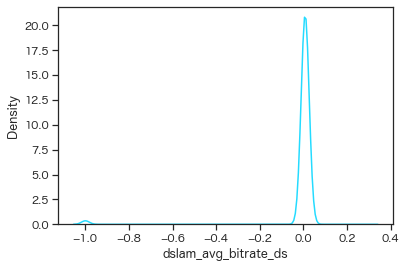

In [11]:
sns.kdeplot(data=train_thermal, x="dslam_avg_bitrate_ds")

In [16]:
print('Mean:',train_noprob.dslam_avg_bitrate_ds.mean())
print('Median:',train_noprob.dslam_avg_bitrate_ds.median())

Mean: -0.03893893386435511
Median: 0.005429610610008237


In [17]:
print('Mean:',train_thermal.dslam_avg_bitrate_ds.mean())
print('Median:',train_thermal.dslam_avg_bitrate_ds.median())

Mean: -0.008195263302477876
Median: 0.007310649380087849


In [18]:
print('Mean:',train_ps.dslam_avg_bitrate_ds.mean())
print('Median:',train_ps.dslam_avg_bitrate_ds.median())

Mean: -0.04102399295275876
Median: 0.006099930033087728


In [20]:
print('Mean:',train_dsl.dslam_avg_bitrate_ds.mean())
print('Median:',train_dsl.dslam_avg_bitrate_ds.median())

Mean: -0.04582543996341963
Median: 0.005429610610008237


In [21]:
print('Mean:',train_healthy.dslam_avg_bitrate_ds.mean())
print('Median:',train_healthy.dslam_avg_bitrate_ds.median())

Mean: -0.044074431316502884
Median: 0.005429377779364583


In [23]:
train['assetid'].nunique()

18020

In [22]:
train.loc[train.label_no_problem==1]['assetid'].nunique()

5964

In [27]:
5964/18020

0.3309655937846837

In [25]:
test['assetid'].nunique()

2016

In [24]:
test.loc[test.label_no_problem==1]['assetid'].nunique()

641

In [28]:
641/2016

0.3179563492063492

In [32]:
test.loc[test.label_cpe_replacement==1]['assetid'].nunique()/test.loc[test.label_healthy==0]['assetid'].nunique() #test['assetid'].nunique()

0.31370449678800855

In [31]:
test.loc[test.label_no_problem==1]['assetid'].nunique()/test.loc[test.label_healthy==0]['assetid'].nunique() #test['assetid'].nunique()

0.6862955032119914

In [30]:
test.loc[test.label_minor_physical_thermal_damage==1]['assetid'].nunique()/test.loc[test.label_healthy==0]['assetid'].nunique() #test['assetid'].nunique()

0.06209850107066381

In [ ]:
train_noprob = train.loc[train.label_no_problem==1][]
train_thermal = train.loc[train.label_minor_physical_thermal_damage==1]